In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchmetrics import Accuracy
from tqdm import tqdm
import random

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cpu
0.21.0+cpu


In [2]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform = None
)

In [3]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_index = train_data.class_to_idx
class_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
print(f"Image Shape: {image.shape} -> [color_channels, height, weight]")
print(f"Image Label: {class_names[label]}")

print("Color Channel is 1 because the Image is black and white")

Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, weight]
Image Label: Ankle boot
Color Channel is 1 because the Image is black and white


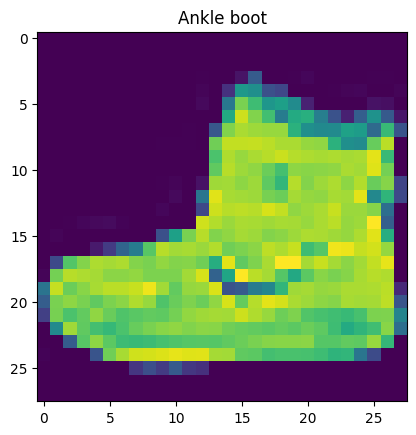

In [11]:
# Visualization
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.show()

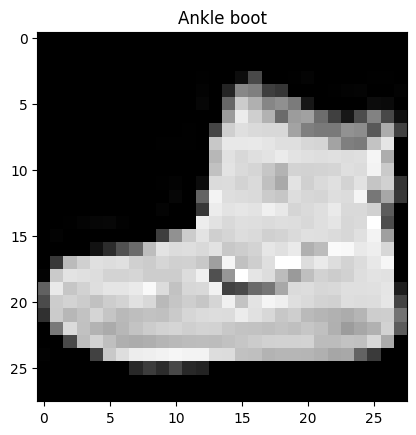

In [12]:
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.show()

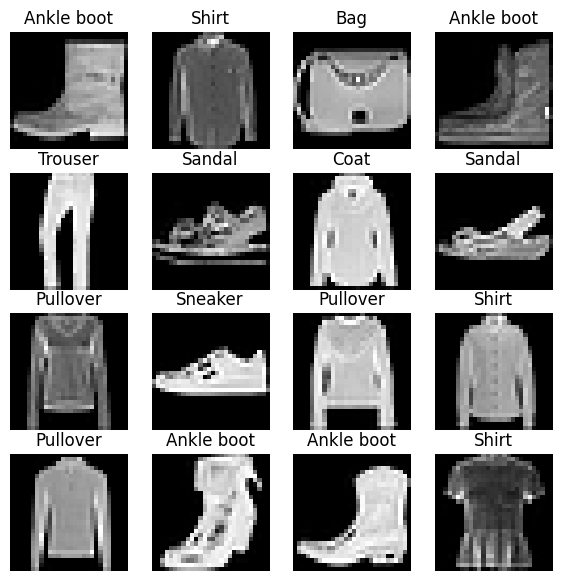

In [13]:
torch.manual_seed(42)
fig = plt.figure(figsize=(7,7))
rows, cols = 4,4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label =  train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [14]:
# Data Loader
BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [15]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1bd22ceeba0>,
 <torch.utils.data.dataloader.DataLoader at 0x1bd23411590>)

In [16]:
print(f'Length of Train DataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of Test DataLoader: {len(test_dataloader)} batches of {BATCH_SIZE}')

Length of Train DataLoader: 1875 batches of 32
Length of Test DataLoader: 313 batches of 32


In [17]:
train_features_batch, train_label_batch = next(iter(train_dataloader))
test_features_batch, test_label_batch = next(iter(test_dataloader))

In [18]:
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [19]:
test_features_batch.shape, test_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

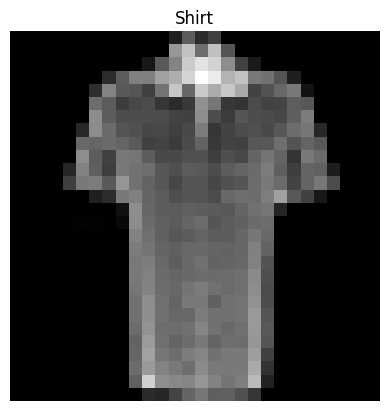

In [20]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label =  train_features_batch[random_idx], train_label_batch[random_idx]
fig.add_subplot(rows, cols, i)
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()

In [21]:
# Create a flatten layer
flatten_model = nn.Flatten()
x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flattening {x.shape}")
print(f"Shape after flattening {output.shape}")

Shape before flattening torch.Size([1, 28, 28])
Shape after flattening torch.Size([1, 784])


In [22]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [23]:
class FashionModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.Linear(hidden_units, output_shape)
        )

    def forward(self, x):
        return self.network(x)

In [24]:
torch.manual_seed(42)
model0 = FashionModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model0

FashionModelV0(
  (network): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [25]:
model0.state_dict()

OrderedDict([('network.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('network.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('network.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.011

In [26]:
# Important Parameters
epochs=5
learning_rate=0.1

In [27]:
# Loss Function and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model0.parameters(), lr=learning_rate)

In [28]:
# Model Training
torch.manual_seed(42)

for epoch in range(epochs):
    train_loss = 0

    for batch, (X,y) in enumerate(train_dataloader):
        model0.train()

        # Forward Pass
        y_pred = model0(X)

        # Loss and Accuracy per batch
        loss = loss_function(y_pred, y)
        train_loss += loss

        # Set Gradients to Zero
        optimizer.zero_grad()

        # BackPropogation
        loss.backward()

        # Update the Parameters
        optimizer.step()

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0 
    model0.eval()
    with torch.inference_mode():
        for batch, (X_test,y_test) in enumerate(test_dataloader):
            # Forward Pass
            test_pred = model0(X_test)
            test_loss = loss_function(test_pred, y_test)
            accuracy = Accuracy(task="multiclass", num_classes=len(class_names))
            test_acc += accuracy(y_test, test_pred.argmax(dim=1))*100
            
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss} | Test Accuracy: {test_acc}")

Epoch: 0 | Train Loss: 0.5903892517089844 | Test Loss: 0.0009820659179240465 | Test Accuracy: 82.03873443603516
Epoch: 1 | Train Loss: 0.4763319790363312 | Test Loss: 0.0008805175311863422 | Test Accuracy: 83.19688415527344
Epoch: 2 | Train Loss: 0.4550333023071289 | Test Loss: 0.0010536637855693698 | Test Accuracy: 83.42652130126953
Epoch: 3 | Train Loss: 0.4425109028816223 | Test Loss: 0.0011772634461522102 | Test Accuracy: 83.74600982666016
Epoch: 4 | Train Loss: 0.43581560254096985 | Test Loss: 0.0013627964071929455 | Test Accuracy: 83.26676940917969


In [29]:
# New Model with Non-Linearity
class FashionModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape)
        )

    def forward(self, x:torch.Tensor):
        return self.network(x)        

In [30]:
torch.manual_seed(42)

model1 = FashionModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names))
model1

FashionModelV1(
  (network): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [31]:
# Important Parameters
epochs=5
learning_rate=0.1

In [32]:
# Loss Function and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate)

<font size="4" color='yellow'>Training Loop (Method)</font>

In [33]:
# Training Loop (Method)

def train_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_function:torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              accuracy):
    train_loss, train_acc = 0,0
    model.train()
    # Add a loop through the training batch
    for batch, (X,y) in enumerate(dataloader):
        # Forward Pass (outputs the raw logits from the model)
        y_pred = model(X)

        # Calcualte Loss and Accuracy per batch
        loss = loss_function(y_pred, y)
        train_loss += loss.item()
        train_acc += accuracy(y, y_pred.argmax(dim=1)).item()*100

        # Set Gradients to zero
        optimizer.zero_grad()
        
        # BackPropogation
        loss.backward()

        # Update the Parameters
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Training Loss: {train_loss:.5f} | Training Accuracy: {train_acc:.2f}%")    
    

<font size="4" color='yellow'>Testing Loop (Method)</font>

In [34]:
# Testing Loop (Method)

def test_step(model:torch.nn.Module,
             dataloader:torch.utils.data.DataLoader,
             loss_function:torch.nn.Module,
             accuracy):
    test_loss, test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            # Forward Pass (outputs the raw logits from the model)
            test_pred = model(X)
            # Calcualte Loss and Accuracy per batch
            loss = loss_function(test_pred, y)
            test_loss += loss.item()
            test_acc += accuracy(y, test_pred.argmax(dim=1)).item()*100

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Testing Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")    

In [35]:
# Performing the Loop using above methods
for epoch in range(epochs):
    print(f"Epoch: {epoch+1}")
    train_step(model=model1,
              dataloader=train_dataloader,
              loss_function=loss_function,
              optimizer=optimizer,
              accuracy=Accuracy(task="multiclass", num_classes=len(class_names))
              )

    test_step(model=model1,
             dataloader=test_dataloader,
             loss_function=loss_function,
             accuracy=Accuracy(task="multiclass", num_classes=len(class_names))
             )
    print('-'*50)

Epoch: 1
Training Loss: 0.64430 | Training Accuracy: 77.08%
Testing Loss: 0.54185 | Test Accuracy: 80.68%
--------------------------------------------------
Epoch: 2
Training Loss: 0.47849 | Training Accuracy: 83.19%
Testing Loss: 0.46595 | Test Accuracy: 83.53%
--------------------------------------------------
Epoch: 3
Training Loss: 0.44442 | Training Accuracy: 84.48%
Testing Loss: 0.49056 | Test Accuracy: 83.20%
--------------------------------------------------
Epoch: 4
Training Loss: 0.42704 | Training Accuracy: 85.06%
Testing Loss: 0.45924 | Test Accuracy: 83.91%
--------------------------------------------------
Epoch: 5
Training Loss: 0.41481 | Training Accuracy: 85.28%
Testing Loss: 0.44047 | Test Accuracy: 84.53%
--------------------------------------------------


<font size="4" color='yellow'>Convolutional Neural Network</font>

In [36]:
class FashionModelV2(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_network1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_network2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                     out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_network1(x)
        # print(x.shape)
        x = self.conv_network2(x)
       # print(x.shape)
        x = self.classifier(x)
        return x

In [37]:
torch.manual_seed(42)
model_2 = FashionModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))
model_2

FashionModelV2(
  (conv_network1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_network2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [38]:
model_2.state_dict()

OrderedDict([('conv_network1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
     

In [39]:
torch.manual_seed(42)

# Create a batch of images
images = torch.rand(size=(32, 3, 64, 64))
test_image = images[0]


In [40]:
print(f'Image Batch Shape {images.shape}')
print(f'Test Image Shape {test_image.shape}')

Image Batch Shape torch.Size([32, 3, 64, 64])
Test Image Shape torch.Size([3, 64, 64])


In [41]:
print(f'Test Image: \n{test_image}')

Test Image: 
tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
         [0.7021, 0.5967, 0.7744,  ..., 0.848

<font size="4" color='yellow'>Stepping through Conv2d Layer</font>

In [42]:
# Create a single conv layer
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=0)
conv_output = conv_layer(test_image)
conv_output

tensor([[[-0.4432, -0.4266, -0.7313,  ..., -0.3842, -0.4029, -0.2580],
         [-0.5172, -0.6280, -0.5067,  ..., -0.5455, -0.2697, -0.3392],
         [-0.6129, -0.4303, -0.3513,  ..., -0.2895, -0.3527, -0.5661],
         ...,
         [-0.4673, -0.3827, -0.3777,  ..., -0.5011, -0.5698, -0.2990],
         [-0.3849, -0.4654, -0.5875,  ..., -0.7656, -0.4689, -0.4657],
         [-0.5404, -0.1720, -0.1813,  ..., -0.7557, -0.5228, -0.5067]],

        [[-0.5316, -0.1805, -0.3830,  ..., -0.3040,  0.1747, -0.1271],
         [-0.0159, -0.2488, -0.2986,  ..., -0.0356, -0.2788, -0.3086],
         [-0.2891, -0.4163, -0.3072,  ..., -0.2823, -0.1784, -0.3035],
         ...,
         [-0.3779, -0.1186, -0.1976,  ..., -0.0708, -0.1470, -0.2759],
         [ 0.0127,  0.0269, -0.0898,  ..., -0.1350, -0.1111, -0.4801],
         [-0.3296,  0.0213,  0.0134,  ..., -0.3110, -0.2932, -0.3754]],

        [[ 0.4062,  0.3490,  0.5550,  ...,  0.5446,  0.4686,  0.3256],
         [ 0.5676,  0.5045,  0.5234,  ...,  0

<font size="4" color='yellow'>Stepping through MaxPool2d Layer</font>

In [43]:
test_image.shape

torch.Size([3, 64, 64])

In [44]:
print(f'Test Image Shape: {test_image.shape}')
print(f'Test Image Shape After Unsqueezing: {test_image.unsqueeze(0).shape}')
max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f'Shape after going through conv_layer: {test_image_through_conv.shape}')

test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f'Shape after going through conv_layer and max_pool_layer: {test_image_through_conv_and_maxpool.shape}')

Test Image Shape: torch.Size([3, 64, 64])
Test Image Shape After Unsqueezing: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer: torch.Size([1, 10, 62, 62])
Shape after going through conv_layer and max_pool_layer: torch.Size([1, 10, 31, 31])


<font size="4" color='yellow'>Train the Model</font>

In [45]:
# Important Parameters
learning_rate = 0.1
epochs = 5

In [46]:
# Loss function and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=learning_rate)

In [47]:
torch.manual_seed(42)

for epoch in range(epochs):
    print(f"Epoch: {epoch+1}")
    train_step(model=model_2,
              dataloader=train_dataloader,
              loss_function=loss_function,
              optimizer=optimizer,
              accuracy=Accuracy(task="multiclass", num_classes=len(class_names))
              )

    test_step(model=model_2,
             dataloader=test_dataloader,
             loss_function=loss_function,
             accuracy=Accuracy(task="multiclass", num_classes=len(class_names))
             )
    print('-'*50)

Epoch: 1
Training Loss: 0.58722 | Training Accuracy: 78.65%
Testing Loss: 0.39505 | Test Accuracy: 86.26%
--------------------------------------------------
Epoch: 2
Training Loss: 0.36266 | Training Accuracy: 86.88%
Testing Loss: 0.33765 | Test Accuracy: 87.63%
--------------------------------------------------
Epoch: 3
Training Loss: 0.32419 | Training Accuracy: 88.12%
Testing Loss: 0.32817 | Test Accuracy: 88.17%
--------------------------------------------------
Epoch: 4
Training Loss: 0.30601 | Training Accuracy: 88.84%
Testing Loss: 0.33379 | Test Accuracy: 87.47%
--------------------------------------------------
Epoch: 5
Training Loss: 0.29418 | Training Accuracy: 89.35%
Testing Loss: 0.31542 | Test Accuracy: 88.64%
--------------------------------------------------


In [58]:
# Comparison Dictionary
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_function: torch.nn.Module, 
               accuracy):
    test_loss, test_acc = 0,0

    model.eval()
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
           # Forward Pass (outputs the raw logits from the model)
            test_pred = model(X)
            # Calcualte Loss and Accuracy per batch
            loss = loss_function(test_pred, y)
            test_loss += loss.item()
            test_acc += accuracy(y, test_pred.argmax(dim=1)).item()*100

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)

    return {"Model_name": model.__class__.__name__,
            "Model_loss": test_loss,
            "Model_accuracy": test_acc}

In [59]:
model_0_results = eval_model(model=model0,
                             dataloader=test_dataloader,
                             loss_function=loss_function,
                             accuracy=Accuracy(task="multiclass", num_classes=len(class_names)))

model_1_results = eval_model(model=model1,
                             dataloader=test_dataloader,
                             loss_function=loss_function,
                             accuracy=Accuracy(task="multiclass", num_classes=len(class_names)))

model_2_results = eval_model(model=model_2,
                             dataloader=test_dataloader,
                             loss_function=loss_function,
                             accuracy=Accuracy(task="multiclass", num_classes=len(class_names)))

In [60]:
model_0_results

{'Model_name': 'FashionModelV0',
 'Model_loss': 0.46869389122476973,
 'Model_accuracy': 83.2667731629393}

In [61]:
model_1_results

{'Model_name': 'FashionModelV1',
 'Model_loss': 0.4404691468222073,
 'Model_accuracy': 84.53474440894568}

In [62]:
model_2_results

{'Model_name': 'FashionModelV2',
 'Model_loss': 0.3154237221557492,
 'Model_accuracy': 88.63817891373802}

In [66]:
# Convert Dictionary into DataFrame
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,Model_name,Model_loss,Model_accuracy
0,FashionModelV0,0.468694,83.266773
1,FashionModelV1,0.440469,84.534744
2,FashionModelV2,0.315424,88.638179


<font size="4" color='yellow'>Visualization</font>

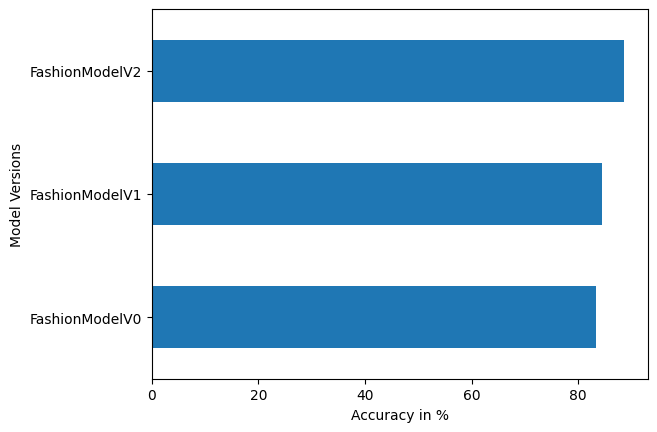

In [67]:
compare_results.set_index('Model_name')['Model_accuracy'].plot(kind='barh')
plt.xlabel('Accuracy in %')
plt.ylabel('Model Versions')
plt.show()

<font size="4" color='yellow'>Make and Evaluate random predictions with best model</font>

In [69]:
def make_predictions(model:torch.nn.Module, data:list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0)

            # Forward Pass
            pred_logits = model(sample)
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
            pred_probs.append(pred_prob)

    return torch.stack(pred_probs)            

In [91]:
#random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape    

torch.Size([1, 28, 28])

In [92]:
len(test_samples)

9

In [93]:
test_samples

[tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.3255, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

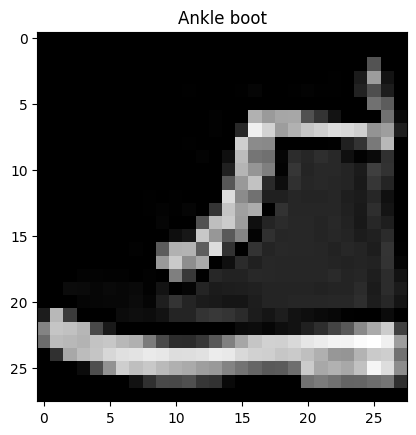

In [95]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])
plt.show()

In [96]:
# Make Predictions
pred_probs = make_predictions(model=model_2, data=test_samples)

pred_probs[:2]

tensor([[5.2239e-06, 1.0913e-06, 4.8267e-07, 2.8339e-06, 2.6179e-07, 9.0496e-03,
         3.8176e-07, 1.0922e-02, 3.9296e-02, 9.4072e-01],
        [2.0739e-05, 4.4009e-07, 4.2075e-06, 9.5998e-08, 9.1763e-07, 3.9819e-04,
         8.5940e-07, 9.7008e-01, 1.8623e-04, 2.9309e-02]])

In [97]:
# Convert Prediction Probabilities into Labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

In [98]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

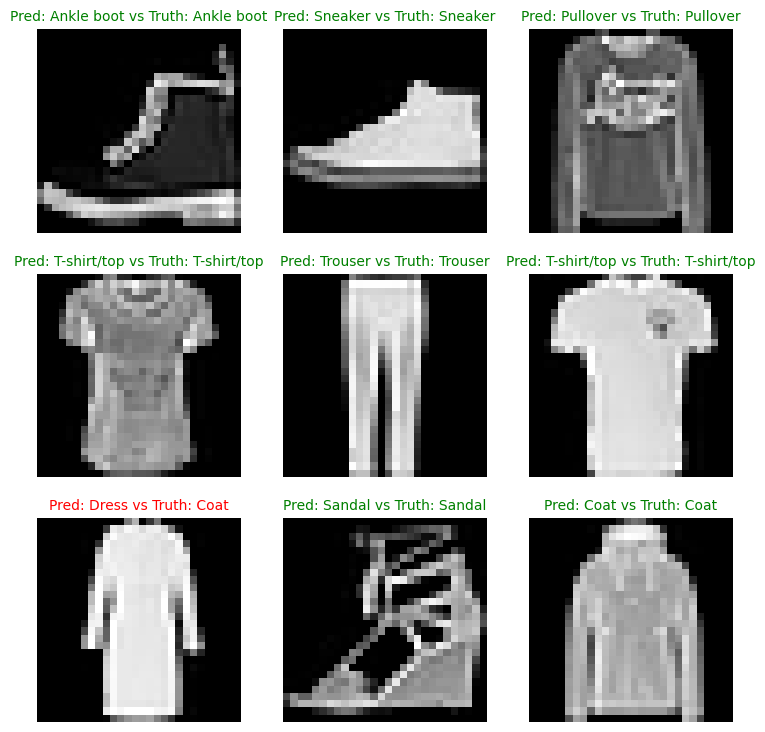

In [100]:
# Plot Predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # Find the Prediction
    pred_label = class_names[pred_classes[i]]

    # Get the Truth Label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f'Pred: {pred_label} vs Truth: {truth_label}'

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')

    plt.axis(False)